In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mini_batch_kmeans import MiniBatchKMeans
import cv2
from util import np_cvt_coord_to_mid_point, np_cvt_coord_to_diagonal

In [133]:
def draw_anchor_boxes(anchor_boxes,scale,origin):
    origin = np.array(origin).reshape(-1,2)
    origin = np.tile(origin,(anchor_boxes.shape[0],1))
    
    anchor_boxes = anchor_boxes * scale
    mid_pt_anchor_boxes = np.concatenate((origin,anchor_boxes),axis=1)
    diagonal_anchor_boxes = np_cvt_coord_to_diagonal(mid_pt_anchor_boxes.reshape(1,-1,4)).reshape(-1,4)
    diagonal_anchor_boxes = diagonal_anchor_boxes.astype(int)
    
    blank_image = np.zeros((scale,scale,3), np.uint8)
    for i in range(diagonal_anchor_boxes.shape[0]):
        box = diagonal_anchor_boxes[i]
        pt1 = (box[0],box[1])
        pt2 = (box[2],box[3])
        cv2.rectangle(blank_image,pt1,pt2,(255,0,0),3)
    return blank_image

In [134]:
train_data = pd.read_csv('annotation_data/train_pascal_voc.csv')
train_data.head(10)

,image_path,label,xmin,ymin,xmax,ymax,xc,yc,w,h
0,.\data\pascal_voc\train\000005.jpg,chair,0.526,0.562667,0.648,0.904000,0.587,0.733333,0.122,0.341333
1,.\data\pascal_voc\train\000005.jpg,chair,0.330,0.704000,0.506,0.992000,0.418,0.848000,0.176,0.288000
2,.\data\pascal_voc\train\000005.jpg,chair,0.010,0.650667,0.134,0.997333,0.072,0.824000,0.124,0.346667
3,.\data\pascal_voc\train\000005.jpg,chair,0.482,0.517333,0.590,0.797333,0.536,0.657333,0.108,0.280000
4,.\data\pascal_voc\train\000005.jpg,chair,0.554,0.496000,0.624,0.586667,0.589,0.541333,0.070,0.090667
5,.\data\pascal_voc\train\000007.jpg,car,0.282,0.150150,1.000,0.990991,0.641,0.570571,0.718,0.840841
6,.\data\pascal_voc\train\000009.jpg,horse,0.138,0.458667,0.540,0.880000,0.339,0.669333,0.402,0.421333
7,.\data\pascal_voc\train\000009.jpg,person,0.300,0.376000,0.458,0.757333,0.379,0.566667,0.158,0.381333
8,.\data\pascal_voc\train\000009.jpg,person,0.570,0.536000,0.654,0.882667,0.612,0.709333,0.084,0.346667
9,.\data\pascal_voc\train\000009.jpg,person,0.516,0.528000,0.594,0.877333,0.555,0.702667,0.078,0.349333


In [135]:
train_data.describe()

,xmin,ymin,xmax,ymax,xc,yc,w,h
count,15662.000000,15662.000000,15662.000000,15662.000000,15662.000000,15662.000000,15662.000000,15662.000000
mean,0.353216,0.342770,0.654055,0.731210,0.503636,0.536990,0.300839,0.388440
std,0.270418,0.216377,0.269756,0.232172,0.234648,0.179867,0.267486,0.268397
min,0.002000,0.002000,0.024000,0.030120,0.013000,0.016566,0.008000,0.012012
25%,0.111535,0.170667,0.450000,0.573393,0.335000,0.440000,0.094000,0.162000
50%,0.320000,0.336183,0.686000,0.762667,0.501539,0.540168,0.200000,0.323331
75%,0.560000,0.493333,0.896000,0.949333,0.674131,0.652725,0.432000,0.578667
max,0.992000,0.970667,1.000000,1.000000,0.996000,0.985333,0.998000,0.998000


In [136]:
k_vs_iou_data = {
    
}

Data has been fitted
 AvgError: 0.47326083995879825, AvgIou: 0.5267391600412018
Cluster Vector =  [[0.27152252 0.44435564]
 [0.67992723 0.71368396]
 [0.09105189 0.15405766]]


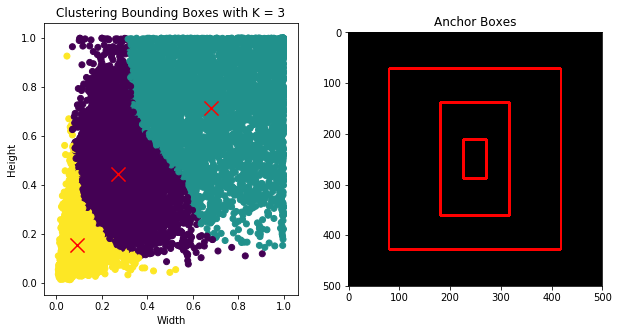

In [137]:
K = 3
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = train_data[['w','h']]
data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(data,iteration_hist=False)
k_vs_iou_data[K] = avg_iou

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(data)

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax1.set_title('Clustering Bounding Boxes with K = %d'% K,)
ax1.set_xlabel('Width')
ax1.set_ylabel('Height')
ax1.scatter(data[:,0],data[:,1],c=cluster_labels)
ax1.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

img = draw_anchor_boxes(k_means.cluster_vectors,500,(250,250))
ax2.set_title('Anchor Boxes')
ax2.imshow(img)
print('Cluster Vector = ', k_means.cluster_vectors)

Data has been fitted
 AvgError: 0.41244528027488825, AvgIou: 0.5875547197251116
Cluster Vector =  [[0.1724636  0.30822887]
 [0.07893261 0.12707858]
 [0.55642995 0.38205223]
 [0.73548726 0.80318732]
 [0.29481723 0.62170516]]


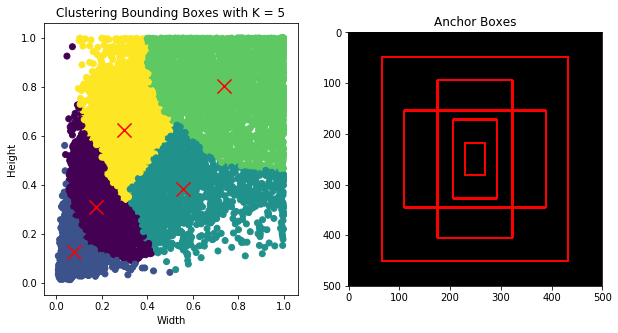

In [138]:
K = 5
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = train_data[['w','h']]
data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(data,iteration_hist=False)
k_vs_iou_data[K] = avg_iou

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(data)

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax1.set_title('Clustering Bounding Boxes with K = %d'% K,)
ax1.set_xlabel('Width')
ax1.set_ylabel('Height')
ax1.scatter(data[:,0],data[:,1],c=cluster_labels)
ax1.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

img = draw_anchor_boxes(k_means.cluster_vectors,500,(250,250))
ax2.set_title('Anchor Boxes')
ax2.imshow(img)
print('Cluster Vector = ', k_means.cluster_vectors)

Data has been fitted
 AvgError: 0.37206790956000624, AvgIou: 0.6279320904399939
Cluster Vector =  [[0.21494718 0.52752348]
 [0.68456351 0.46116806]
 [0.40957952 0.72276392]
 [0.06764168 0.10770327]
 [0.34657782 0.31420592]
 [0.13683866 0.24335653]
 [0.82528422 0.81939254]]


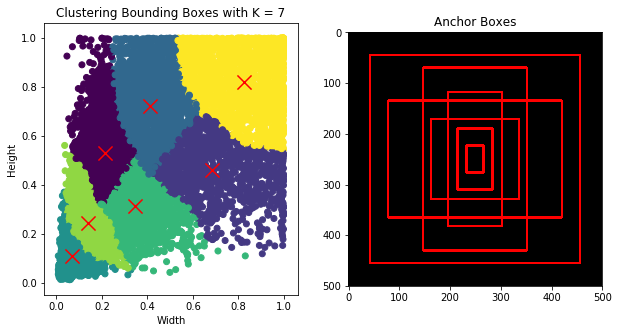

In [139]:
K = 7
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = train_data[['w','h']]
data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(data,iteration_hist=False)
k_vs_iou_data[K] = avg_iou

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(data)

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax1.set_title('Clustering Bounding Boxes with K = %d'% K,)
ax1.set_xlabel('Width')
ax1.set_ylabel('Height')
ax1.scatter(data[:,0],data[:,1],c=cluster_labels)
ax1.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

img = draw_anchor_boxes(k_means.cluster_vectors,500,(250,250))
ax2.set_title('Anchor Boxes')
ax2.imshow(img)
print('Cluster Vector = ', k_means.cluster_vectors)

Data has been fitted
 AvgError: 0.34134568148082894, AvgIou: 0.658654318519171
Cluster Vector =  [[0.30066901 0.66743748]
 [0.76313733 0.46272237]
 [0.09447183 0.2692592 ]
 [0.19466286 0.17736258]
 [0.40406826 0.32122135]
 [0.18409304 0.43698848]
 [0.84740256 0.83024133]
 [0.0588133  0.10000159]
 [0.51044193 0.76849413]]


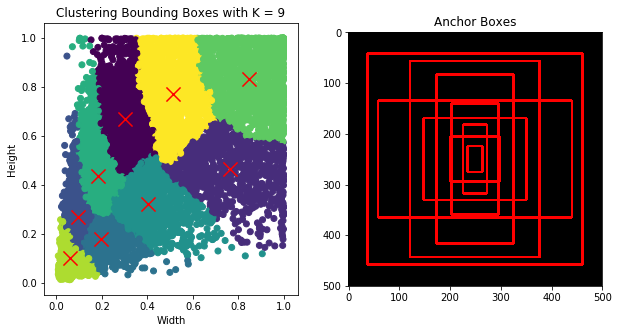

In [140]:
K = 9
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = train_data[['w','h']]
data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(data,iteration_hist=False)
k_vs_iou_data[K] = avg_iou

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(data)

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax1.set_title('Clustering Bounding Boxes with K = %d'% K,)
ax1.set_xlabel('Width')
ax1.set_ylabel('Height')
ax1.scatter(data[:,0],data[:,1],c=cluster_labels)
ax1.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

img = draw_anchor_boxes(k_means.cluster_vectors,500,(250,250))
ax2.set_title('Anchor Boxes')
ax2.imshow(img)
print('Cluster Vector = ', k_means.cluster_vectors)

Data has been fitted
 AvgError: 0.3196275609454276, AvgIou: 0.6803724390545725
Cluster Vector =  [[0.16213661 0.45161316]
 [0.55856908 0.23847616]
 [0.2738968  0.70783646]
 [0.87085159 0.86372501]
 [0.35831919 0.45026043]
 [0.52020235 0.76691633]
 [0.14743144 0.14166328]
 [0.23985429 0.27145917]
 [0.0571206  0.08934306]
 [0.0870711  0.25761181]
 [0.78578415 0.51650622]]


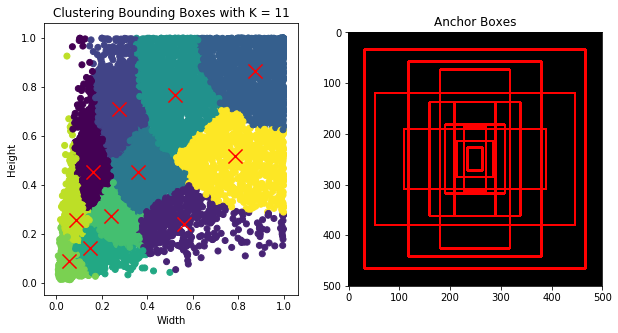

In [141]:
K = 11
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = train_data[['w','h']]
data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(data,iteration_hist=False)
k_vs_iou_data[K] = avg_iou

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(data)

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax1.set_title('Clustering Bounding Boxes with K = %d'% K,)
ax1.set_xlabel('Width')
ax1.set_ylabel('Height')
ax1.scatter(data[:,0],data[:,1],c=cluster_labels)
ax1.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

img = draw_anchor_boxes(k_means.cluster_vectors,500,(250,250))
ax2.set_title('Anchor Boxes')
ax2.imshow(img)
print('Cluster Vector = ', k_means.cluster_vectors)

Data has been fitted
 AvgError: 0.3017383737499908, AvgIou: 0.6982616262500093
Cluster Vector =  [[0.37705139 0.70879508]
 [0.37186979 0.42580846]
 [0.2100099  0.2925958 ]
 [0.710587   0.42105703]
 [0.07336362 0.20986402]
 [0.86211654 0.62262629]
 [0.56017342 0.80621804]
 [0.05297267 0.08001583]
 [0.1200795  0.38005586]
 [0.14759254 0.14625241]
 [0.41783314 0.22031658]
 [0.21902241 0.60406264]
 [0.91869615 0.90597824]]


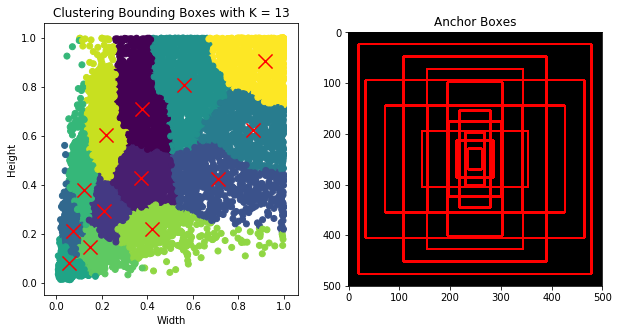

In [142]:
K = 13
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = train_data[['w','h']]
data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(data,iteration_hist=False)
k_vs_iou_data[K] = avg_iou

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(data)

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax1.set_title('Clustering Bounding Boxes with K = %d'% K,)
ax1.set_xlabel('Width')
ax1.set_ylabel('Height')
ax1.scatter(data[:,0],data[:,1],c=cluster_labels)
ax1.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

img = draw_anchor_boxes(k_means.cluster_vectors,500,(250,250))
ax2.set_title('Anchor Boxes')
ax2.imshow(img)
print('Cluster Vector = ', k_means.cluster_vectors)

Data has been fitted
 AvgError: 0.2844238903231881, AvgIou: 0.7155761096768118
Cluster Vector =  [[0.51153807 0.52792898]
 [0.0446616  0.07626128]
 [0.21522604 0.34370795]
 [0.70973291 0.3294104 ]
 [0.12844342 0.10669985]
 [0.39920245 0.22409037]
 [0.31386221 0.46483227]
 [0.10177922 0.38264063]
 [0.58674152 0.83008736]
 [0.20352214 0.63933795]
 [0.85696828 0.59795298]
 [0.16683324 0.20278074]
 [0.06432997 0.20689981]
 [0.35032491 0.7758601 ]
 [0.86687923 0.90196349]]


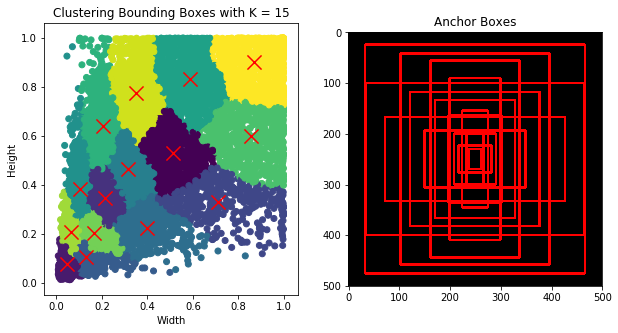

In [143]:
K = 15
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = train_data[['w','h']]
data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(data,iteration_hist=False)
k_vs_iou_data[K] = avg_iou

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(data)

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax1.set_title('Clustering Bounding Boxes with K = %d'% K,)
ax1.set_xlabel('Width')
ax1.set_ylabel('Height')
ax1.scatter(data[:,0],data[:,1],c=cluster_labels)
ax1.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

img = draw_anchor_boxes(k_means.cluster_vectors,500,(250,250))
ax2.set_title('Anchor Boxes')
ax2.imshow(img)
print('Cluster Vector = ', k_means.cluster_vectors)

Data has been fitted
 AvgError: 0.2711847497683095, AvgIou: 0.7288152502316906
Cluster Vector =  [[0.35372718 0.79800738]
 [0.20054212 0.68410637]
 [0.88550755 0.90870212]
 [0.28630924 0.51804108]
 [0.84099437 0.62304092]
 [0.04223172 0.07421932]
 [0.39485932 0.18263066]
 [0.15911177 0.44222129]
 [0.41271389 0.37190771]
 [0.77355652 0.36911731]
 [0.05976589 0.17732673]
 [0.12561103 0.09971463]
 [0.16745442 0.20135631]
 [0.09785697 0.35230536]
 [0.57485858 0.87177423]
 [0.2401976  0.30185543]
 [0.50929752 0.57139748]]


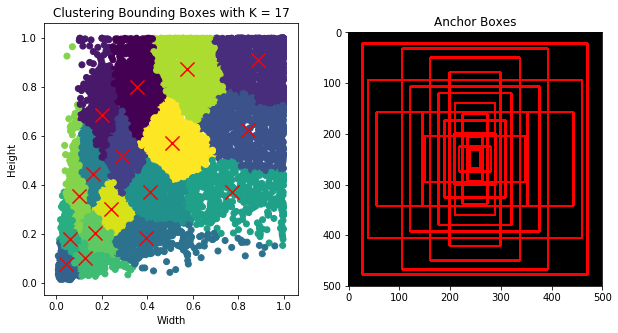

In [144]:
K = 17
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = train_data[['w','h']]
data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(data,iteration_hist=False)
k_vs_iou_data[K] = avg_iou

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(data)

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax1.set_title('Clustering Bounding Boxes with K = %d'% K,)
ax1.set_xlabel('Width')
ax1.set_ylabel('Height')
ax1.scatter(data[:,0],data[:,1],c=cluster_labels)
ax1.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

img = draw_anchor_boxes(k_means.cluster_vectors,500,(250,250))
ax2.set_title('Anchor Boxes')
ax2.imshow(img)
print('Cluster Vector = ', k_means.cluster_vectors)

Data has been fitted
 AvgError: 0.2590246315716996, AvgIou: 0.7409753684283005
Cluster Vector =  [[0.78208408 0.41150658]
 [0.42434126 0.39682938]
 [0.20542007 0.69762419]
 [0.09399986 0.27070541]
 [0.1892722  0.14572176]
 [0.10359841 0.09937191]
 [0.32576579 0.23471405]
 [0.03817577 0.0691252 ]
 [0.12397513 0.45765142]
 [0.6072924  0.85624344]
 [0.3148934  0.56949398]
 [0.9085347  0.89928908]
 [0.23341331 0.40912209]
 [0.17061017 0.27562941]
 [0.82915872 0.6344475 ]
 [0.0552878  0.18124088]
 [0.36843488 0.81342237]
 [0.57829339 0.24972554]
 [0.51408899 0.5978379 ]]


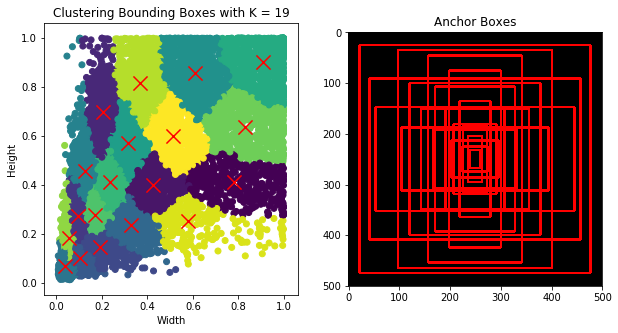

In [145]:
K = 19
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = train_data[['w','h']]
data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(data,iteration_hist=False)
k_vs_iou_data[K] = avg_iou

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(data)

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax1.set_title('Clustering Bounding Boxes with K = %d'% K,)
ax1.set_xlabel('Width')
ax1.set_ylabel('Height')
ax1.scatter(data[:,0],data[:,1],c=cluster_labels)
ax1.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

img = draw_anchor_boxes(k_means.cluster_vectors,500,(250,250))
ax2.set_title('Anchor Boxes')
ax2.imshow(img)
print('Cluster Vector = ', k_means.cluster_vectors)

Data has been fitted
 AvgError: 0.25103249271787975, AvgIou: 0.7489675072821202
Cluster Vector =  [[0.42703241 0.39497598]
 [0.19192429 0.69273438]
 [0.10576662 0.08916544]
 [0.1841655  0.28174805]
 [0.05548558 0.18068944]
 [0.6414483  0.23908293]
 [0.08727147 0.33700487]
 [0.12085687 0.19392228]
 [0.31731034 0.80541031]
 [0.14347205 0.4611794 ]
 [0.24374364 0.40807617]
 [0.79962662 0.39301969]
 [0.91784749 0.93142785]
 [0.5800229  0.54216996]
 [0.4658915  0.78061354]
 [0.84316662 0.62313086]
 [0.33415365 0.23767121]
 [0.23043372 0.13971963]
 [0.3169934  0.57174812]
 [0.65417182 0.8392315 ]
 [0.04292745 0.07073782]]


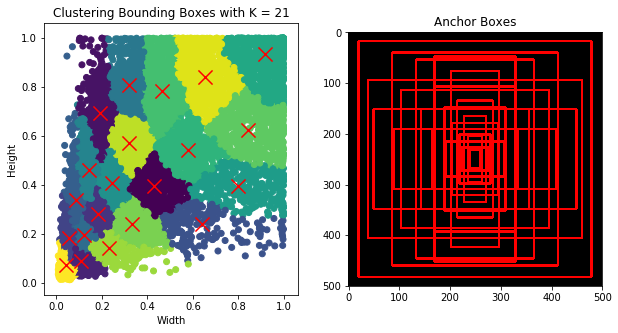

In [146]:
K = 21
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = train_data[['w','h']]
data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(data,iteration_hist=False)
k_vs_iou_data[K] = avg_iou

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(data)

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax1.set_title('Clustering Bounding Boxes with K = %d'% K,)
ax1.set_xlabel('Width')
ax1.set_ylabel('Height')
ax1.scatter(data[:,0],data[:,1],c=cluster_labels)
ax1.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

img = draw_anchor_boxes(k_means.cluster_vectors,500,(250,250))
ax2.set_title('Anchor Boxes')
ax2.imshow(img)
print('Cluster Vector = ', k_means.cluster_vectors)

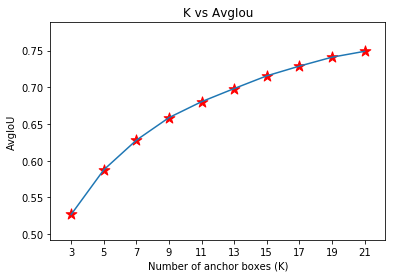

In [147]:
data = np.array(list(k_vs_iou_data.items()))
plt.xlabel('Number of anchor boxes (K)')
plt.ylabel('AvgIoU')
plt.xticks(ticks=data[:,0])
plt.title('K vs AvgIou')
plt.scatter(data[:,0],data[:,1],c='r',marker='*',s=128)
plt.plot(data[:,0],data[:,1])